In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv("../Data/penguins_size.csv")

In [3]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
data.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
X = pd.get_dummies(data.drop('species',axis=1),drop_first=True)

In [7]:
y = data['species']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rfc  = RandomForestClassifier(n_estimators=10)

In [12]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [14]:
preds = rfc.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [16]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



In [17]:
confusion_matrix(y_test, preds)

array([[41,  0,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]], dtype=int64)

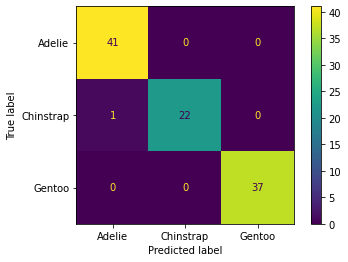

In [20]:
plot_confusion_matrix(rfc, X_test, y_test)

In [31]:
pd.DataFrame(index=X_train.columns, data=rfc.feature_importances_, columns=['feature importance'])

,feature importance
culmen_length_mm,0.298512
culmen_depth_mm,0.181004
flipper_length_mm,0.258678
body_mass_g,0.133597
island_Dream,0.102258
island_Torgersen,0.016381
sex_FEMALE,0.002753
sex_MALE,0.006816
